<h1> MLP From Scratch (All formulas)</h1>

$ Feed forward: $

$$z^l_j = \sum_k w^l_{jk} a^{l-1}_k + b^l_j$$

$$a^l = \sigma(z^l)$$


$ Backpropagation: $

Calculating delta for output layer:

$$\delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j)$$

$$ Or: $$
$$\delta^L = \nabla_a C \odot \sigma'(z^L)$$

Example:

$$
\Large
\nabla_a C = 
\begin{bmatrix}
\frac{\partial C_0}{\partial a^L_{0,0}} & \frac{\partial C_0}{\partial a^L_{1,0}} & \cdots & \frac{\partial C_0}{\partial a^L_{j,0}} \\
\frac{\partial C_1}{\partial a^L_{0,1}} & \frac{\partial C_1}{\partial a^L_{1,2}} & \cdots & \frac{\partial C_1}{\partial a^L_{j,1}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial C_x}{\partial a^L_{0,x}} & \frac{\partial C_x}{\partial a^L_{1,x}} & \cdots & \frac{\partial C_x}{\partial a^L_{j,x}}
\end{bmatrix}
$$

Calculating delta for hidden layers:

$$\delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l)$$

Changing loss respect to bias (Chain rule):

$$\frac{\partial C}{\partial b^l_j} = \delta^l_j$$

Changing loss respect to weight (Chain rule):

$$\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$$

Updating weights and biases:

$$
w^l \leftarrow w^l - \frac{\eta}{m} \sum_x \delta_{x,l} (a^{l-1}_x)^T
$$

$$
b^l \leftarrow b^l - \frac{\eta}{m} \sum_x \delta_{x,l}
$$

$
\begin{aligned}
& C \text{ - cost/loss function } \\
& \sigma \text{ - activation function (sigmoid, Relu etc.)} \\
& \delta \text{ - the gradient of the error with respect to the output of a neuron } \\
& w \text{ - weight } \\
& b \text{ - bias } \\
& z \text{ - preactivated neuron } \\
& a \text{ - activated neuron } \\
& l \text{ - layer } \\
& j \text{ - to neuron } \\
& k \text{ - from neuron }\\
& x \text{ - sample } 
\end{aligned}
$


<h2>Here on the example of MLP with 2 inputs, 4 hidden layers (relu activation) and 1 output layer with sigmoid activation the feedforward and backpropagation computations will be described: </h2>

<h1> Feedforward computation step by step </h1>


<h4> Step 1. Calculation of neuron outputs for layer 1</h4>

```python

def relu(x):
    return np.maximum(0, x)

preactivated_neurons_layer1 = np.dot(inputs, weights_layer_1) + biases_layer1
activated_neurons_layer1 = relu(preactivated_neurons)
```

$$
z^l_j = \sum_k w^l_{jk} a^{l-1}_k + b^l_j
$$

$$
a^l = \sigma(z^l)
$$

$$
\begin{bmatrix}
    a^{0}_{0,0} & a^{0}_{1,0} \\
    a^{0}_{0,1} & a^{0}_{1,1} \\
    a^{0}_{0,2} & a^{0}_{1,2} \\
    \dots & \dots \\
    a^{0}_{0,x} & a^{0}_{1,x} \\
\end{bmatrix}
\times
\begin{bmatrix}
    w^1_{00} & w^1_{10} &  w^1_{20} &  w^1_{30} \\
    w^1_{01} & w^1_{11} &  w^1_{21} &  w^1_{31} \\
\end{bmatrix}
+
\begin{bmatrix}
    b^{1}_0 & b^{1}_1 & ab{1}_2 & b^{1}_3
\end{bmatrix}
=
\begin{bmatrix}
    a^{1}_0 & a^{1}_1 & a^{1}_2 & a^{1}_3
\end{bmatrix}
$$

$
\begin{aligned}
& x \text{ - Sample index (here equal to batch size)  } 
\end{aligned} \\
$

<h4> Step 2. Calculation of neuron outputs for layer 2</h4>

```python

def sigmoid(x):        
    return 1 / (1 + np.exp(-x))

preactivated_neurons_layer2 = np.dot(activated_neurons_layer1, weights_layer_2) + biases_layer2
activated_neurons_layer2 = sigmoid(preactivated_neurons)
```

$$
\begin{bmatrix}
    a^{1}_0 & a^{1}_1 & a^{1}_2 & a^{1}_3
\end{bmatrix}
\times
\begin{bmatrix}
    w^2_{00} \\
    w^2_{01} \\
    w^2_{02} \\
    w^2_{03} \\
\end{bmatrix}
+
\begin{bmatrix}
    b^{2}_0 
\end{bmatrix}
=
\begin{bmatrix}
    a^{2}_0 
\end{bmatrix}
$$

<h2> Hand written version<h2>
<div style='display: flex; justify-content: center'; > <img src='img/feedforward.jpeg' width='70%' height='70%'> </div>

<h1> Backpropagation algorithm computation step by step </h1>


<h4> Step 1. Calculate the delta for the output Layer 2 (L):</h4>

```python
output_layer = self.layers[1]
output_delta = self.df_loss_mse(y_true, y_pred) * output_layer.df_activation(output_layer.output)
```

$$
\Large
\delta^2 = 
\begin{bmatrix}
\frac{\partial C_0}{\partial a^2_{0,0}} \\
\frac{\partial C_1}{\partial a^2_{0,1}} \\
\vdots \\
\frac{\partial C_x}{\partial a^2_{0,x}}
\end{bmatrix}
\odot 
\begin{bmatrix}
\sigma'(z^2_{0,0}) \\
\sigma'(z^2_{0,1}) \\
\vdots \\
\sigma'(z^2_{0,x})
\end{bmatrix}
=
\begin{bmatrix}
\delta^2_0 \\
\delta^2_1 \\
\vdots \\
\delta^2_x
\end{bmatrix}
$$

$$ 
\text{for MSE  } \frac{\partial C_x}{\partial a^L_{j,x}} = \hat a - a^L_{j,x}
$$

$$ 
\text{for Sigmoid } \sigma'(z^L_{j,x}) = a^L_{j,x}(1 -  a^L_{j,x})
$$

$
\begin{aligned}
& \hat a \text{ - true value } \\
& a \text{ - activated output of } {j}^{th} \text{ neuron in L layer} \\
& x \text{ - Sample index (here equal to batch size)  } 
\end{aligned} \\
\text{And here j = 0 since we have only 1 neuron in the output layer}
$

<h4> Step 2. Calculate change of loss (gradient) respect to biases and weights: </h4>

```python

hidden_layer = self.layers[0]

vw_loss_output = np.dot(hidden_layer.output.T, output_delta)
```
$$\frac{\partial C}{\partial w^2_{jk}} = a^{1}_k \delta^2_j$$
```python

# sum axis = 0 means sum for each sample
vb_loss_output = np.sum(output_delta, axis=0, keepdims=True)
```
$$\frac{\partial C}{\partial b^2_j} = \delta^2_j$$

```python

# Update weights and biases for the output layer
output_layer.weights = output_layer.weights - lp * vw_loss_output / batch_size
```

$$
w^2 \leftarrow w^2 - \frac{\eta}{m} \sum_x \delta_{x,2} (a^{1}_x)^T
$$

```python
output_layer.biases = output_layer.biases - lp * vb_loss_output / batch_size
```
$$
b^2 \leftarrow b^2 - \frac{\eta}{m} \sum_x \delta_{x,2}
$$

```python

propageted_error = np.dot(output_delta, output_layer.weights.T)
```
$$ (w^{l+1})^T \delta^{l+1}$$

```python

# Calculate delta for hidden layer
hidden_derivative_activated = hidden_layer.df_activation(hidden_layer.output)
hidden_delta = propageted_error * hidden_derivative_activated
```
$$\delta^1 = ((w^{2})^T \delta^{2}) \odot \sigma'(z^1)$$

```python


# Calculate the gradient for hidden layer weights and biases
vw_loss_hidden = np.dot(inputs.T, hidden_delta)
```
$$\frac{\partial C}{\partial w^1_{jk}} = a^{0}_k \delta^1_j$$
```python

vb_loss_hidden = np.sum(hidden_delta, axis=0, keepdims=True)
```
$$\frac{\partial C}{\partial b^1_j} = \delta^1_j$$

```python


# Update weights and biases for the hidden layer where a0 is inputs
hidden_layer.weights = hidden_layer.weights - lp * vw_loss_hidden / batch_size
```

$$
w^1 \leftarrow w^1 - \frac{\eta}{m} \sum_x \delta_{x,1} (a^{0}_x)^T
$$

```python
hidden_layer.biases = hidden_layer.biases - lp * vb_loss_hidden / batch_size
```
$$
b^1 \leftarrow b^1 - \frac{\eta}{m} \sum_x \delta_{x,1}
$$


<h2> Hand written version <h2>
<div style='display: flex; justify-content: center'; > <img src='img/backpropagation.jpeg' width='70%' height='70%'> </div>

# Implementation

In [4]:
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


def plot_decision_boundary_categorical(model, X, y, resolution=0.02):
    # Define the color maps
    markers = ('s', 'x', 'o', '^', 'v', '+', 'p', 'd', 'h', '8', '<', '>')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange', 'pink', 'purple', 'brown', 'black', 'yellow', 'green')
    cmap = ListedColormap(colors[:len(np.unique(np.argmax(y, axis=1)))])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.forward(grid)
    
    Z = np.argmax(Z, axis=1)
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot the data points
    for idx, cl in enumerate(np.unique(np.argmax(y, axis=1))):
        plt.scatter(x=X[np.argmax(y, axis=1) == cl, 0], 
                    y=X[np.argmax(y, axis=1) == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # plt.legend(loc='upper left')
    plt.legend()

    plt.show()


def plot_nn_history(nn, skip_epochs=0):
    fig, axs = plt.subplots(2)
    fig.suptitle('Training history')
    axs[0].set_ylim(0, 1)
    axs[0].plot(range(skip_epochs, len(nn.history_accuracy)), nn.history_accuracy[skip_epochs:], label='Train')
    axs[0].plot(range(skip_epochs, len(nn.history_val_accuracy)), nn.history_val_accuracy[skip_epochs:], label='Validation')
    axs[0].legend()
    axs[0].set_title('Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')

    max_loss = np.max([np.max(nn.history_loss), np.max(nn.history_val_loss)])
    axs[1].set_ylim(0, max_loss + max_loss * 0.1)
    axs[1].plot(range(skip_epochs, len(nn.history_loss)), nn.history_loss[skip_epochs:], label='Train')
    axs[1].plot(range(skip_epochs, len(nn.history_val_loss)), nn.history_val_loss[skip_epochs:], label='Validation')
    axs[1].legend()
    axs[1].set_title('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')

    plt.tight_layout()

    plt.show()


In [6]:
def standard_scaler(x):
    """
     convert the data to have a mean of 0 and a standard deviation of 1
    """
    
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

def make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    if isinstance(centers, int):
        centers = np.random.uniform(center_box[0], center_box[1], size=(centers, n_features))
    else:
        centers = np.array(centers)

    if len(centers) < 1:
        raise ValueError("The number of centers must be at least 1")

    n_clusters = len(centers)

    n_samples_per_cluster = [n_samples // n_clusters] * n_clusters
    for i in range(n_samples % n_clusters):
        n_samples_per_cluster[i] += 1

    X = []
    y = []

    for i, (n, center) in enumerate(zip(n_samples_per_cluster, centers)):
        cluster_points = np.random.normal(loc=center, scale=cluster_std, size=(n, n_features))
        X.append(cluster_points)
        y += [i] * n

    X = np.vstack(X)
    y = np.array(y)

    return X, y

def to_categorical(y):
    """
        [0, 4, 2] -> [ [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 1, 0, 0] ]
    """

    categorical = np.zeros((y.size, y.max()+1))
    categorical[np.arange(y.size), y] = 1
    return categorical

def train_test_split(X, y, test_size=0.25, random_state=None, shuffle=True):
    if random_state is not None:
        np.random.seed(random_state)

    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

    n_test = int(X.shape[0] * test_size)
    X_train, X_test = X[:-n_test], X[-n_test:]
    y_train, y_test = y[:-n_test], y[-n_test:]

    return X_train, X_test, y_train, y_test

In [7]:
class LayerDense:
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    @staticmethod
    def sigmoid(x):
        x = np.clip(x, -500, 500)
                
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def heaviside(x):
        return np.heaviside(x, 0)
    
    @staticmethod
    def softmax(x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        probs = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return probs
    
    
    def df_activation(self, activated_output):
        """
            activated_output -> aL = σ(zL)
        """

        if self.activation == LayerDense.sigmoid:
            return activated_output * (1 - activated_output)
        elif self.activation == LayerDense.relu:
            return np.where(activated_output <= 0, 0, 1)
        elif self.activation == LayerDense.softmax:
            batch_size = activated_output.shape[0]
            # Initialize the tensor for storing the derivatives
            d_softmax = np.zeros((batch_size, activated_output.shape[1], activated_output.shape[1]))
            for i in range(batch_size):
                s = activated_output[i].reshape(-1, 1)
                d_softmax[i] = np.diagflat(s) - np.dot(s, s.T)

            return d_softmax


    def __init__(self, inputs_len, neurons_len, activation=relu):
        self.weights = np.random.randn(inputs_len, neurons_len) * np.sqrt(2. / inputs_len)
        # print(self.weights)
        self.biases = np.zeros(neurons_len)
        self.activation = activation

    def forward(self, inputs):
        self.output = self.activation(np.dot(inputs, self.weights) + self.biases)
        return self.output

In [8]:
class NeuralNetwork:
    @staticmethod
    def loss_mse(y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    @staticmethod
    def df_loss_mse(y_true, y_pred):
        return y_pred - y_true
    
    @staticmethod
    def loss_binary_crossentropy(y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    @staticmethod
    def loss_categorical_crossentropy(y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    
        loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
        return loss

    def __init__(self, loss=loss_mse, log=True):
        self.log = log
        self.loss = loss
        self.history_accuracy = []
        self.history_loss = []
        self.history_val_accuracy = []
        self.history_val_loss = []
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, inputs):
        for layer in self.layers:
            layer.forward(inputs)
            inputs = layer.output

        return inputs
    
    def calculate_output_delta(self, layer, y_true, y_pred):
        if layer.activation == LayerDense.softmax:
            return y_pred - y_true
        if layer.activation == LayerDense.sigmoid:
            grad_loss_input = self.df_loss_mse(y_true, y_pred) # derivative of loss function = ∇aL | samples -> neurons
            activation_derivative = layer.df_activation(layer.output) # derivative of sigmoid(zL) = sigmoid(zL) * (1 - sigmoid(zL)) | samples -> neurons

            return grad_loss_input * activation_derivative # δL = ∇aL * σ'(zL) | samples -> neurons

    def backward_auto(self, inputs, y_true, y_pred, lr, batch_size):
        layers_count = len(self.layers)

        for layer_index in reversed(range(0, layers_count)):
            layer = self.layers[layer_index]

            is_output_layer = layer_index == layers_count - 1
            
            if is_output_layer:
                # output layer
                layer.delta = self.calculate_output_delta(layer, y_true, y_pred)
                # print(layer.delta)
            else:
                prev_backward_layer = self.layers[layer_index + 1]        

                layer.propagated_error = np.dot(prev_backward_layer.delta, prev_backward_layer.weights.T) # δL * wL.T

                layer.activation_derivative = layer.df_activation(layer.output) 
                layer.delta = layer.propagated_error * layer.activation_derivative

            if layer_index != 0:
                next_backward_layer = self.layers[layer_index - 1]

                next_backward_layer_output = next_backward_layer.output.T
            else:
                next_backward_layer_output = inputs.T

            layer.grad_loss_weights = np.dot(next_backward_layer_output, layer.delta) # ∇wL = aL-1.T * δL | neurons -> neurons
            layer.grad_loss_biases = np.sum(layer.delta, axis=0, keepdims=True)  # ∇bL = δL | neurons -> 1

            # clip the gradients to prevent exploding gradients
            np.clip(layer.grad_loss_weights, -1, 1, out=layer.grad_loss_weights)  
            np.clip(layer.grad_loss_biases, -1, 1, out=layer.grad_loss_biases)

            layer.weights = layer.weights - lr * layer.grad_loss_weights / batch_size
            layer.biases = layer.biases - lr * layer.grad_loss_biases / batch_size

    def validation_train_split(self, inputs, y_true, validation_split, log=True):
        """
            Split the data into training and validation sets based on the validation_split percentage
        """

        x_val = inputs[-int(len(inputs) * validation_split):]
        y_val = y_true[-int(len(inputs) * validation_split):]
        x_true = inputs[:-int(len(inputs) * validation_split)]
        y_true = y_true[:-int(len(inputs) * validation_split)]

        if log:
            print(f'Validation set size: {len(x_val)}')
            print(f'Training set size: {len(x_true)}')


        return x_val, y_val, x_true, y_true

    def output_layer(self):
        return self.layers[-1]
    
    def accuracy(self, y_true, y_pred):
        if self.output_layer().activation == LayerDense.softmax:
            return np.mean(y_pred == y_true.argmax(axis=1))
        if self.output_layer().activation == LayerDense.sigmoid:
            return np.mean(y_true == np.round(y_pred))
        
    def evaluate(self, x, y):
        total_loss = self.loss(y, self.forward(x))
        accuracy = self.accuracy(y, self.predict(x))

        return total_loss, accuracy

    def record_history(self, x_train, y_train, x_val, y_val, epoch, epochs):
        validation_loss, validation_accuracy = self.evaluate(x_val, y_val)
        loss, accuracy = self.evaluate(x_train, y_train)

        self.history_accuracy.append(accuracy)
        self.history_loss.append(loss)
        self.history_val_accuracy.append(validation_accuracy)
        self.history_val_loss.append(validation_loss)

        if self.log:
            print(f'Evaluation set size: {len(x_train)}')
            print(f'Validation set size: {len(x_val)}')
            print(f'Epoch: {epoch+1}/{epochs} | loss {loss} | accuracy {accuracy} | validation loss {validation_loss} | validation accuracy {validation_accuracy}')
        
    def save_layers(self, path):
        np.save(path, self.layers)

    def load_layers(self, path):
        self.layers = np.load(path, allow_pickle=True)

    def fit(self, inputs, y_true, learning_rate=0.01, epochs=10, batch_size=10, validation_split=0.1):
        print(f'Total iterations {epochs * (math.ceil(len(inputs) / batch_size))}')
        print(f'Iterations of each epoch {math.ceil(len(inputs) / batch_size)}')

        x_val, y_val, x_true, y_true = self.validation_train_split(inputs, y_true, validation_split)

        for epoch in range(epochs):
            self.record_history(x_true, y_true, x_val, y_val, epoch, epochs)

            shuffle_indices = np.random.permutation(len(x_true))
            x_true = x_true[shuffle_indices]
            y_true = y_true[shuffle_indices]

            for i in range(0, len(x_true), batch_size):
                inputs_batch = x_true[i:i+batch_size]
                y_true_batch = y_true[i:i+batch_size]

                y_hats = self.forward(inputs_batch) # predict the output
                 
                self.backward_auto(
                    inputs_batch, 
                    y_true_batch, 
                    y_hats, 
                    learning_rate, 
                    batch_size
                )

    def predict(self, inputs):
        y_hat = self.forward(inputs)

        if self.output_layer().activation == LayerDense.softmax:
            return y_hat.argmax(axis=1)
        if self.output_layer().activation == LayerDense.sigmoid:
            return np.round(y_hat)


<h1> Testing MLP on Blobs</h1>

<h2>Binary Classification: Output Sigmoid (2 classes) </h2>

X_train shape: (210, 2)
y_train shape: (210,)
X_test shape: (90, 2)
y_test shape: (90,)


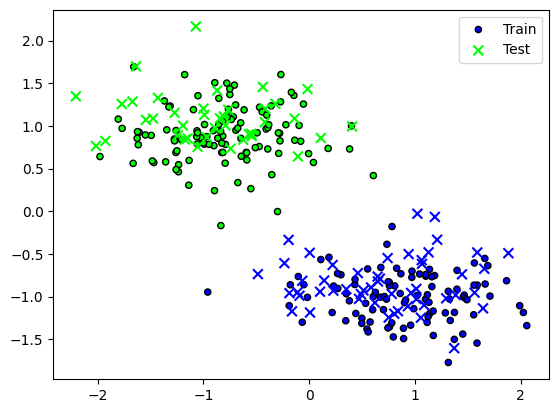

In [28]:
n_features = 2
n_classes = 2
n_samples= 300
cluster_std = 2


X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, cluster_std=cluster_std, random_state=51)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = standard_scaler(X_train)
X_test = standard_scaler(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.brg, marker='x', s=50, label='Test')

plt.legend()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

In [29]:
mlp_2 = NeuralNetwork(loss=NeuralNetwork.loss_mse)

mlp_2.add(LayerDense(2, 4, LayerDense.relu))
mlp_2.add(LayerDense(4, 1, LayerDense.sigmoid))

Total iterations 210
Iterations of each epoch 21
Validation set size: 21
Training set size: 189
Evaluation set size: 189
Validation set size: 21
Epoch: 1/10 | loss 0.2578855656252028 | accuracy 0.4708994708994709 | validation loss 0.28018785152286946 | validation accuracy 0.47619047619047616
Evaluation set size: 189
Validation set size: 21
Epoch: 2/10 | loss 0.03859369729589254 | accuracy 0.9894179894179894 | validation loss 0.03531264409641298 | validation accuracy 1.0
Evaluation set size: 189
Validation set size: 21
Epoch: 3/10 | loss 0.02342463989327246 | accuracy 0.9894179894179894 | validation loss 0.020700332126077206 | validation accuracy 1.0
Evaluation set size: 189
Validation set size: 21
Epoch: 4/10 | loss 0.017766160306319983 | accuracy 0.9894179894179894 | validation loss 0.015013292657363326 | validation accuracy 1.0
Evaluation set size: 189
Validation set size: 21
Epoch: 5/10 | loss 0.01464936497541446 | accuracy 0.9894179894179894 | validation loss 0.011801386740571032 |

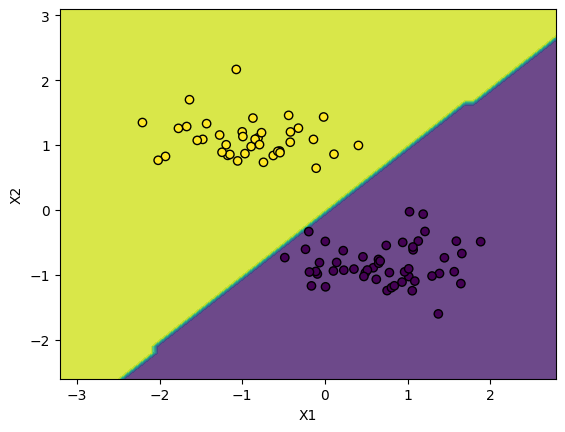

In [11]:
reshaped_y_true = y_train.reshape(-1, 1)  # [1, 0, 0, 0] -> [[1], [0], [0], [0]] | since here we have outputs from 

mlp_2.fit(X_train, reshaped_y_true, 0.3, 10, 10)

plot_decision_boundary(mlp_2, X_test, y_test.reshape(-1, 1))

In [12]:
test_loss, test_acc = mlp_2.evaluate(X_test, y_test.reshape(-1, 1))
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test loss: 0.010366942778275825
Test accuracy: 1.0


<h2>Multyclass Classification: Output Softmax (n classes) </h2>

X_train shape: (140, 2)
y_train shape: (140, 5)
X_test shape: (34, 2)
y_test shape: (34, 5)


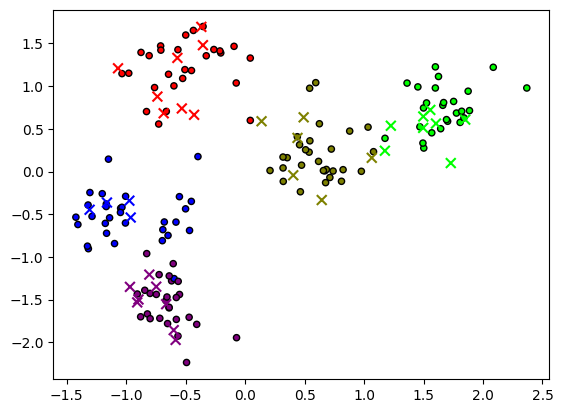

In [13]:
n_dimensions = 2
n_classes = 5
n_samples= 174
cluster_std = 1.4

X, y = make_blobs(n_samples=n_samples, n_features=n_dimensions, centers=n_classes, cluster_std=cluster_std, random_state=91)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = standard_scaler(X_train)
X_test = standard_scaler(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.brg, marker='x', s=50, label='Test')


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

In [14]:
np.random.seed(0)

mlp_n_class = NeuralNetwork(loss=NeuralNetwork.loss_categorical_crossentropy, log=True)

mlp_n_class.add(LayerDense(n_dimensions, 16, LayerDense.relu))
mlp_n_class.add(LayerDense(16, 8, LayerDense.relu))
mlp_n_class.add(LayerDense(8, n_classes, LayerDense.softmax))


Total iterations 216
Iterations of each epoch 18
Validation set size: 14
Training set size: 126
Evaluation set size: 126
Validation set size: 14
Epoch: 1/12 | loss 2.19741227833135 | accuracy 0.18253968253968253 | validation loss 1.799993543987481 | validation accuracy 0.21428571428571427
Evaluation set size: 126
Validation set size: 14
Epoch: 2/12 | loss 1.2917046045785612 | accuracy 0.35714285714285715 | validation loss 1.174731368571104 | validation accuracy 0.35714285714285715
Evaluation set size: 126
Validation set size: 14
Epoch: 3/12 | loss 0.9690678610333748 | accuracy 0.746031746031746 | validation loss 0.9201132757041686 | validation accuracy 0.7142857142857143
Evaluation set size: 126
Validation set size: 14
Epoch: 4/12 | loss 0.7928638269297509 | accuracy 0.8412698412698413 | validation loss 0.759216866936025 | validation accuracy 0.7857142857142857
Evaluation set size: 126
Validation set size: 14
Epoch: 5/12 | loss 0.665849765199981 | accuracy 0.8650793650793651 | validati

C:\Users\ferra\AppData\Local\Temp\ipykernel_32924\994078991.py:41: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[np.argmax(y, axis=1) == cl, 0],


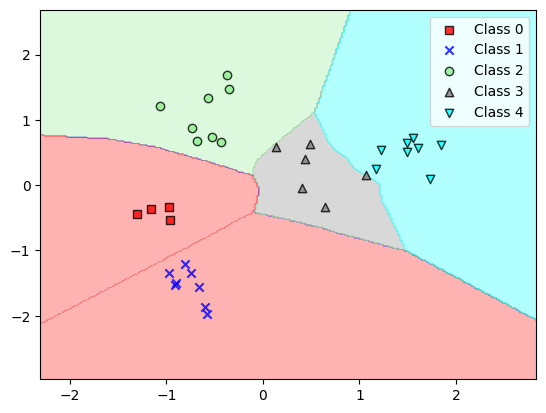

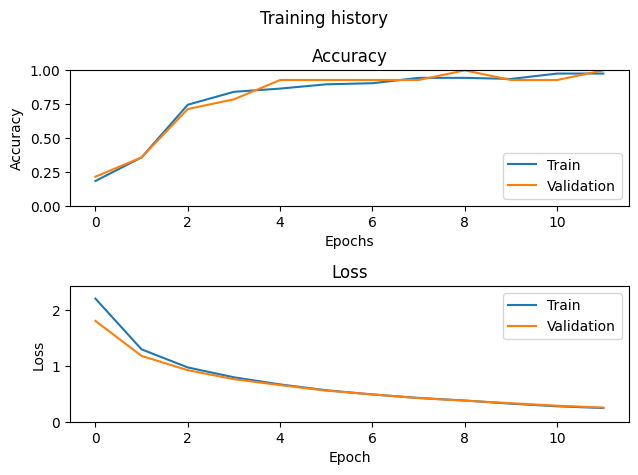

In [15]:
mlp_n_class.fit(X_train, y_train, learning_rate=0.05, epochs=12, batch_size=8)

plot_decision_boundary_categorical(mlp_n_class, X_test, y_test, 0.02)
plot_nn_history(mlp_n_class)

In [16]:
test_loss, test_acc = mlp_n_class.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test loss: 0.20347186596939482
Test accuracy: 0.9705882352941176


<h1> Testing MNIST </h1>

In [17]:
from tensorflow.keras.datasets import mnist

In [18]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# partition = 1

# train_images = train_images[:int(len(train_images) * partition)]
# train_labels = train_labels[:int(len(train_labels) * partition)]

# test_images = test_images[:int(len(test_images) * partition)]
# test_labels = test_labels[:int(len(test_labels) * partition)]

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Converts 0-255 values to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0


print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000, 10)
Test images shape: (10000, 28, 28)
Test labels shape: (10000, 10)


In [19]:
np.random.seed(0)

mlp_mnist = NeuralNetwork(loss=NeuralNetwork.loss_categorical_crossentropy)

mlp_mnist.add(LayerDense(784, 128, LayerDense.relu)) # first layer with 128 neurons and input shape of 784 (28x28)
mlp_mnist.add(LayerDense(128, 32, LayerDense.relu))
mlp_mnist.add(LayerDense(32, 10, LayerDense.softmax))

In [20]:
flattned_train_images = train_images.reshape(-1, 784) # 28x28 -> 784

In [22]:
mlp_mnist.fit(flattned_train_images, train_labels, learning_rate=0.01, epochs=20, batch_size=150)

Total iterations 8000
Iterations of each epoch 400
Validation set size: 6000
Training set size: 54000
Evaluation set size: 54000
Validation set size: 6000
Epoch: 1/20 | loss 0.15463365363234594 | accuracy 0.9560740740740741 | validation loss 0.13290882016844985 | validation accuracy 0.9628333333333333
Evaluation set size: 54000
Validation set size: 6000
Epoch: 2/20 | loss 0.1517622758557378 | accuracy 0.9566481481481481 | validation loss 0.13106448208313462 | validation accuracy 0.9631666666666666
Evaluation set size: 54000
Validation set size: 6000
Epoch: 3/20 | loss 0.14931062620099514 | accuracy 0.9572777777777778 | validation loss 0.1292608188482351 | validation accuracy 0.9645
Evaluation set size: 54000
Validation set size: 6000
Epoch: 4/20 | loss 0.1469471822242227 | accuracy 0.9582777777777778 | validation loss 0.12747505053830444 | validation accuracy 0.9658333333333333
Evaluation set size: 54000
Validation set size: 6000
Epoch: 5/20 | loss 0.14437059508708464 | accuracy 0.9589

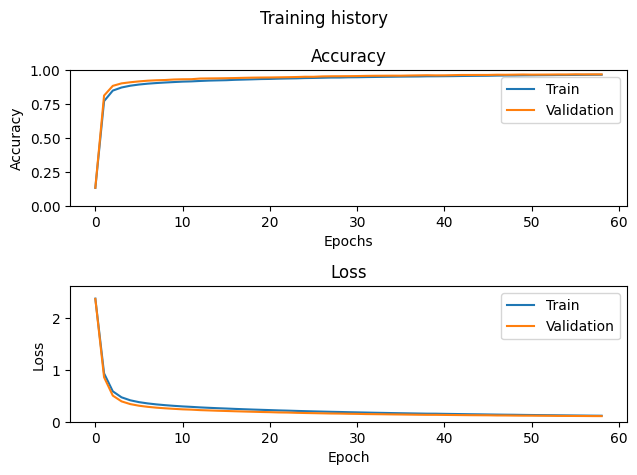

In [23]:
plot_nn_history(mlp_mnist)

# Test evaluation loss, accuracy

In [25]:
test_loss, test_acc = mlp_mnist.evaluate(test_images.reshape(-1, 784), test_labels)
print(f'Test size: {test_labels.shape}')
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test size: (10000, 10)
Test loss: 0.12376357867291417
Test accuracy: 0.9639


In [ ]:
# Save the model
mlp_mnist.save_layers('mnist_model.npy')

In [ ]:
# Load the model
mlp_mnist.load_layers('mnist_model.npy')

In [26]:
test_predictions = mlp_mnist.predict(test_images.reshape(-1, 784))

In [27]:
def show_25_pred(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    plt.suptitle('0 - 25 digits from MNIST dataset')

    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
        plt.xlabel(f'Label: {labels[i].argmax()} | Prediction: {predictions[i]}')

    plt.tight_layout()
    plt.show()

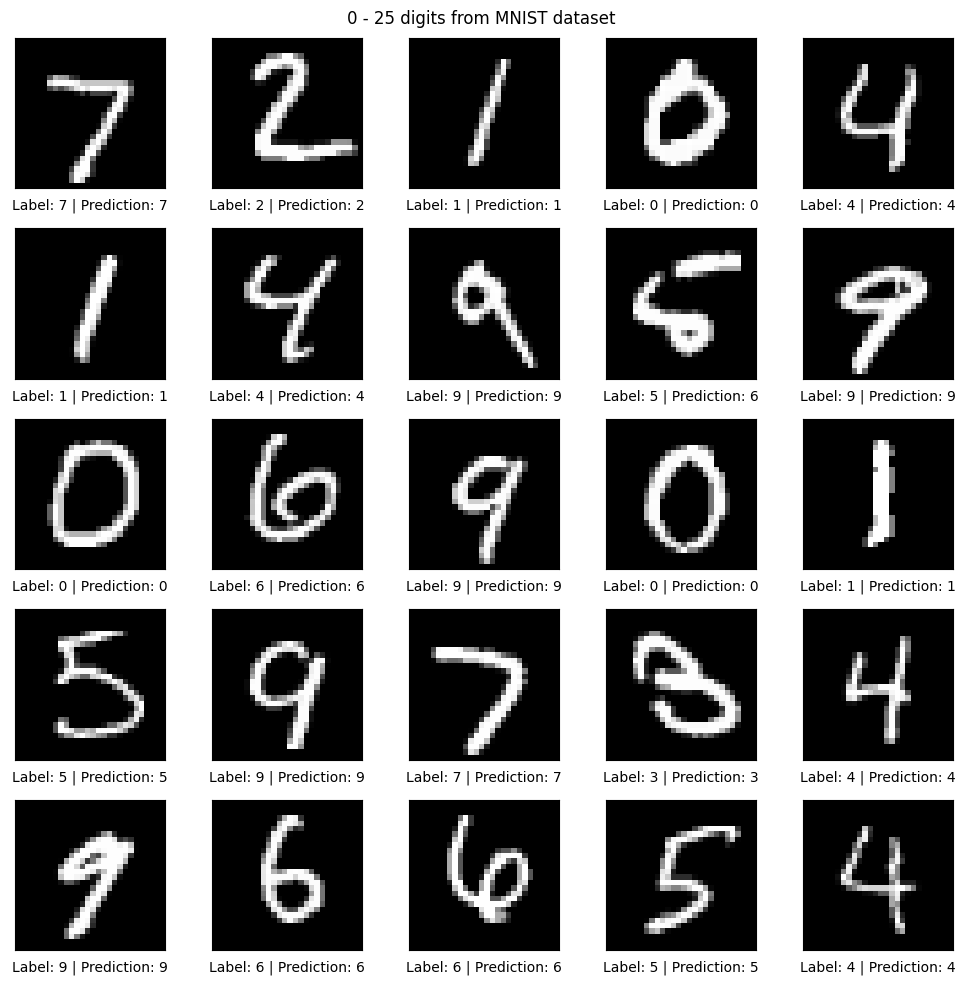

In [ ]:
show_25_pred(test_images, test_labels, test_predictions)

Text(113.9222222222222, 0.5, 'True labels')

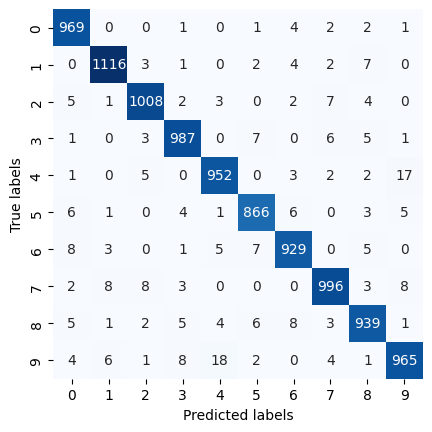

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = mlp_mnist.forward(test_images.reshape(-1, 784))
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# False predictions

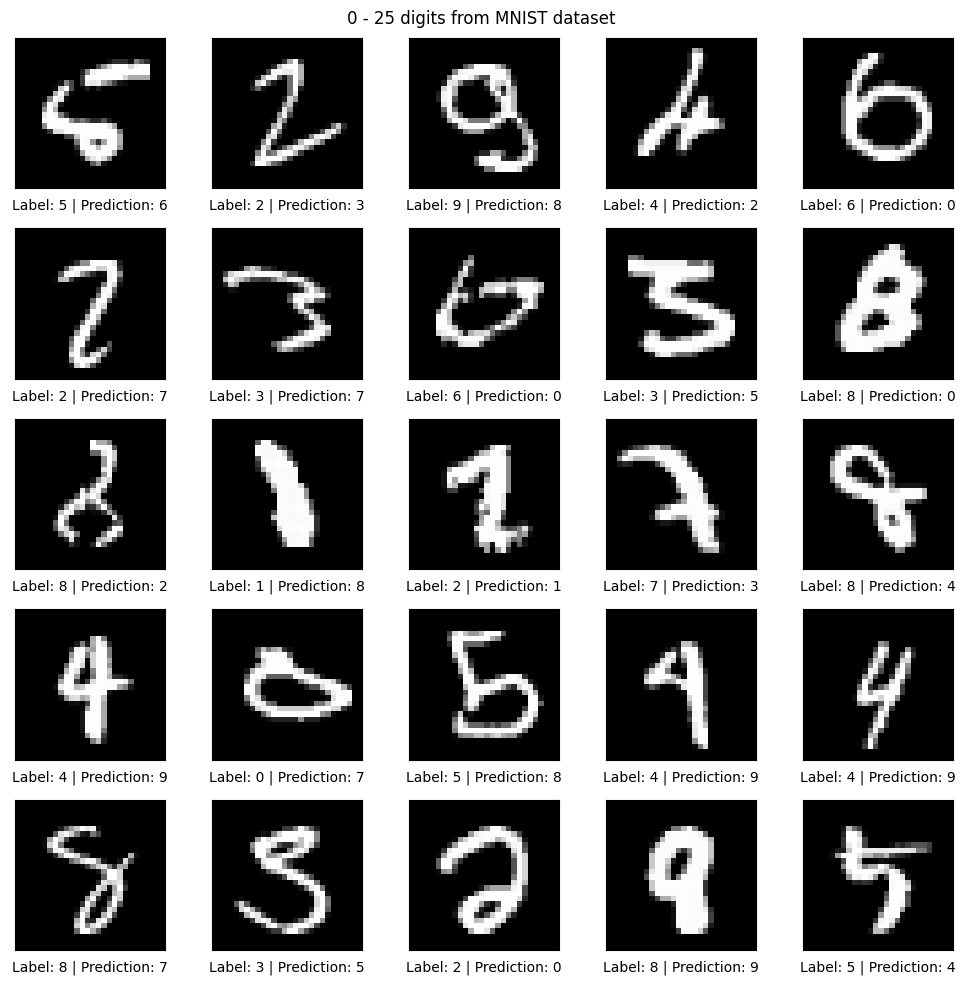

In [ ]:
diff = test_predictions == test_labels.argmax(axis=1)

false_indexes = np.where(diff == False)[0]

test_false_predictions = test_images[false_indexes]
test_true_labels = test_labels[false_indexes]

show_25_pred(test_false_predictions, test_true_labels, test_predictions[false_indexes])

# Data Augmentation